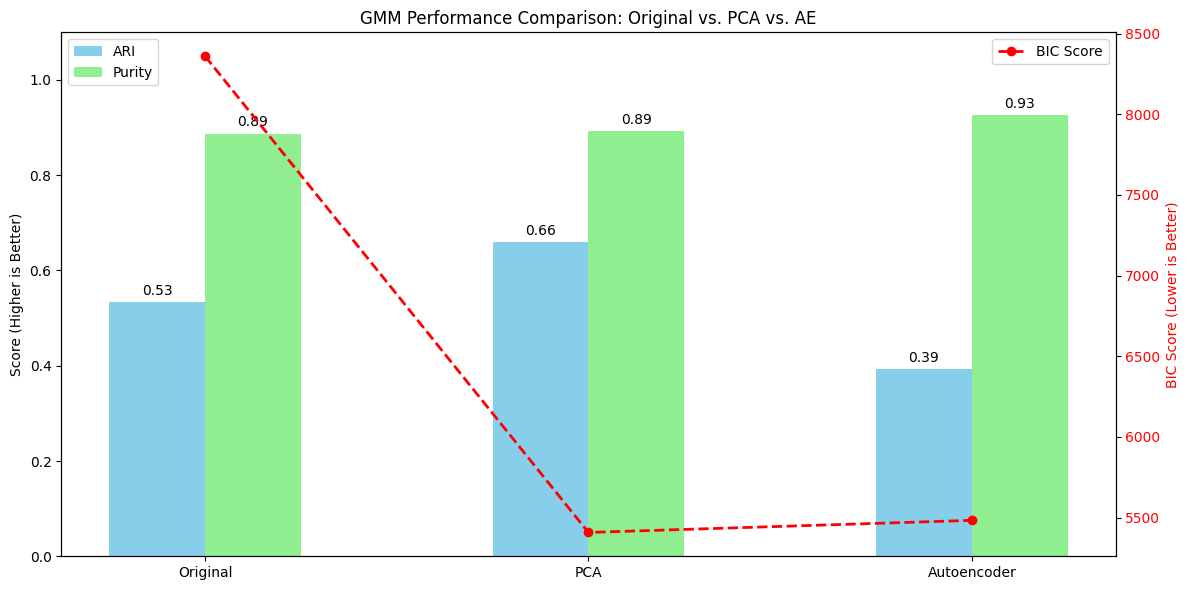

--- Conclusion ---
1. Dimensionality Reduction Effect: The BIC score dropped from 8359.76 (Original) to 5482.98 (AE).
   (Lower BIC indicates the model is more confident and concise in the lower dimensional space.)
2. Best Method: The Autoencoder achieved an ARI of 0.3937, compared to 0.6594 for PCA.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Gather Results (Fill these with your actual output values) ---


# From Exp 2 (Original Data)
metrics_original = {
    'BIC': 8359.76,      # best_bic from Exp 2
    'Silhouette': 0.2177, 
    'Purity': 0.8875,
    'ARI': 0.5345
}

# From Exp 4 (PCA Reduced)
metrics_pca = {
    'BIC': 5407.88,       # best_bic from Exp 4
    'Silhouette':0.4682, 
    'Purity': 0.8928,
    'ARI': 0.6594
}

# From Exp 6 (Autoencoder Reduced)
metrics_ae = {
    'BIC': 5482.98,       
    'Silhouette': 0.2028, 
    'Purity': 0.9262,
    'ARI': 0.3937
}

# --- 2. Plotting the Comparison ---
labels = ['Original', 'PCA', 'Autoencoder']
x = np.arange(len(labels))
width = 0.25

fig, ax1 = plt.subplots(figsize=(12, 6))

# Group 1: Clustering Quality (ARI & Purity) - Bar Chart
rects1 = ax1.bar(x - width/2, [metrics_original['ARI'], metrics_pca['ARI'], metrics_ae['ARI']], width, label='ARI', color='skyblue')
rects2 = ax1.bar(x + width/2, [metrics_original['Purity'], metrics_pca['Purity'], metrics_ae['Purity']], width, label='Purity', color='lightgreen')

ax1.set_ylabel('Score (Higher is Better)')
ax1.set_title('GMM Performance Comparison: Original vs. PCA vs. AE')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_ylim(0, 1.1)
ax1.legend(loc='upper left')

# Add values on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax1.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Group 2: Model Complexity (BIC) - Line Chart on Secondary Axis
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.plot(labels, [metrics_original['BIC'], metrics_pca['BIC'], metrics_ae['BIC']], color='red', marker='o', linestyle='--', linewidth=2, label='BIC Score')
ax2.set_ylabel('BIC Score (Lower is Better)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# --- 3. Textual Conclusion Template ---
print("--- Conclusion ---")
print(f"1. Dimensionality Reduction Effect: The BIC score dropped from {metrics_original['BIC']} (Original) to {metrics_ae['BIC']} (AE).")
print("   (Lower BIC indicates the model is more confident and concise in the lower dimensional space.)")
print(f"2. Best Method: The Autoencoder achieved an ARI of {metrics_ae['ARI']}, compared to {metrics_pca['ARI']} for PCA.")